### Question 1

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("batting.csv")
df.head()
df.shape

(102816, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

### 3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [21]:
by_player_year=df.groupby(['playerID','yearID'],as_index=False)[['HR']].sum()
len(by_player_year[by_player_year['HR']>=40]['playerID'].unique())

142

### 4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [24]:
by_player=df.groupby(['playerID'],as_index=False)[['HR']].sum()
by_player[by_player['HR']>600].reset_index(drop=True)

,playerID,HR
0,aaronha01,755
1,bondsba01,762
2,griffke02,630
3,mayswi01,660
4,rodrial01,696
5,ruthba01,714
6,sosasa01,609
7,thomeji01,612


### 5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [28]:
by_player_year_new=df.groupby(['playerID','yearID'],as_index=False)[['2B','3B','H','HR']].sum()
len(by_player_year_new[(by_player_year_new['HR']>=30) & (by_player_year_new['2B']>=40) & (by_player_year_new['3B']>=10) & (by_player_year_new['H']>=200)] ['playerID'].unique())

11

### 6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [13]:
by_player_sb=df.groupby(['playerID','yearID'],as_index=False)[['SB']].sum()
pd.DataFrame(by_player_sb[by_player_sb['SB']>=100]['playerID'].unique(),columns=['PlayerID'])

,PlayerID
0,brocklo01
1,brownpe01
2,brownto01
3,colemvi01
4,comisch01
5,fogarji01
6,hamilbi01
7,henderi01
8,lathaar01
9,nicolhu01


### 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [20]:
by_1960= df[df['yearID'].isin(range(1960,1970))]
by_1960_player=by_1960.groupby('playerID',as_index=False)[['HR']].sum()
by_1960_player[by_1960_player['HR']>200].sort_values(by=['HR'],ascending=False).reset_index(drop=True)

,playerID,HR
0,killeha01,393
1,aaronha01,375
2,mayswi01,350
3,robinfr02,316
4,mccovwi01,300
5,howarfr01,288
6,cashno01,278
7,bankser01,269
8,mantlmi01,256
9,cepedor01,254


### 8)	Who has hit the most HRs in history? (Dataframe)

In [22]:
by_player_hr=df.groupby('playerID',as_index=False)[['HR']].sum()
by_player_hr[by_player_hr['HR']==max(by_player_hr['HR'])]

,playerID,HR
1542,bondsba01,762


### 9)	Who had the most hits in the 1970s? (Dataframe)

In [25]:
by_1970=df[df['yearID'].isin(range(1970,1980))]
by_1970_player=by_1970.groupby('playerID',as_index=False)[['H']].sum()
by_1970_player[by_1970_player['H']==max(by_1970_player['H'])]

,playerID,H
1639,rosepe01,2045


### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [5]:
#PA= AB +BB + IBB + SH +SF
#Average= H/AB
#OBP(on base percentage)=(H+BB+IBB+SH+SF)/AB
by_1977=df[df['yearID']==1977]
by_1977_player=by_1977.groupby('playerID',as_index=False)[['AB','BB','IBB','SH','SF','H']].sum()
by_1977_player['PA']=by_1977_player['AB']+by_1977_player['BB']+by_1977_player['IBB']+by_1977_player['SH']+by_1977_player['SF']
by_1977_player=by_1977_player[by_1977_player['PA']>=500]
by_1977_player['OBP']= np.where(by_1977_player['AB'] != 0,(by_1977_player['PA']-by_1977_player['AB']+by_1977_player['H'])/by_1977_player['AB'],0)
by_1977_player[['playerID','OBP']].sort_values(by='OBP',ascending=False).head(5).reset_index(drop=True)

,playerID,OBP
0,singlke01,0.563433
1,smithre06,0.559426
2,tenacge01,0.556064
3,hargrmi01,0.540952
4,carewro01,0.534091


### 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [6]:
by_2013=df[df['yearID']==2013]
by_2013_player=by_2013.groupby('playerID',as_index=False)[['AB','BB','IBB','SH','SF','H']].sum()
by_2013_player['PA']=by_2013_player['AB']+by_2013_player['BB']+by_2013_player['IBB']+by_2013_player['SH']+by_2013_player['SF']
by_2013_player['Average']=np.where(by_2013_player['AB']!=0,by_2013_player['H']/by_2013_player['AB'],0)
by_2013_player[by_2013_player['PA']>=300][['playerID','Average']].sort_values(by='Average',ascending=False).head(8).reset_index(drop=True)

,playerID,Average
0,cabremi01,0.347748
1,ramirha01,0.345395
2,cuddymi01,0.331288
3,mauerjo01,0.323596
4,troutmi01,0.322581
5,johnsch05,0.321012
6,freemfr01,0.319419
7,puigya01,0.319372


### 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [9]:
by_1940s=df[df['yearID'].isin(range(1940,1950))]
by_1940s_player=by_1940s.groupby('playerID',as_index=False)[['H']].sum()
by_1940s_player.sort_values(by='H',ascending=False).head(10).reset_index(drop=True)

,playerID,H
0,boudrlo01,1578
1,elliobo01,1563
2,walkedi02,1512
3,musiast01,1432
4,doerrbo01,1407
5,holmeto01,1402
6,applilu01,1376
7,nichobi01,1328
8,marioma01,1310
9,cavarph01,1304


### 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [37]:
by_player_year_h=df.groupby(['playerID','yearID'],as_index=False)[['H']].sum()
by_player_year_h_max=by_player_year_h.groupby('yearID',as_index=False)[['H']].max()
final_df=pd.merge(by_player_year_h,by_player_year_h_max,on=['yearID','H'],how='right')
most_hits=final_df.groupby('playerID',as_index=False)[['yearID']].count().rename(columns={'yearID':'Number_of_times'}).sort_values(by=['Number_of_times'],ascending=False).reset_index(drop=True)
print(most_hits[most_hits['Number_of_times']==max(most_hits['Number_of_times'])])
print("the maximum number of times is " + str(max(most_hits['Number_of_times']))) 

    playerID  Number_of_times
0  suzukic01                7
1   cobbty01                7
2   rosepe01                7
the maximum number of times is 7


### 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [6]:
by_players=df.groupby('playerID',as_index=False)[['G']].sum()
by_players.sort_values(by='G',ascending=False).head(5).reset_index(drop=True)

,playerID,G
0,rosepe01,3562
1,yastrca01,3308
2,aaronha01,3298
3,henderi01,3081
4,cobbty01,3035


### 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [34]:
by_players=df.groupby('playerID',as_index=False)[['H','HR']].sum()
len(by_players[(by_players['H']>3000) & (by_players['HR'] >= 500)]['playerID'].unique())

5

### 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here



In [11]:
by_year= df.groupby('yearID')[['HR']].sum()
by_year.loc[1988,'HR']

3180

### 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [18]:
#PA= AB +BB + IBB + SH +SF
#Average= H/AB
#OBP(on base percentage)=(H+BB+IBB+SH+SF)/AB
by_wade_boggs=df[(df['nameFirst']=='Wade')& (df['nameLast']=='Boggs')].groupby(['nameFirst','nameLast','yearID'],as_index=False)[['H','AB']].sum()
by_wade_boggs['Average']=np.where(by_wade_boggs['AB']!=0,by_wade_boggs['H']/by_wade_boggs['AB'],0)
by_wade_boggs[by_wade_boggs['AB'] >=500].sort_values(by='Average',ascending=False).head(3).reset_index(drop=True)

,nameFirst,nameLast,yearID,H,AB,Average
0,Wade,Boggs,1985,240,653,0.367534
1,Wade,Boggs,1988,214,584,0.366438
2,Wade,Boggs,1987,200,551,0.362976


### 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [6]:
by_1995_player=df[df['yearID']==1995].groupby('playerID',as_index=False)[['H','AB','BB','IBB','SH','SF']].sum()
by_1995_player['PA']=by_1995_player['AB']+by_1995_player['BB']+by_1995_player['IBB']+by_1995_player['SH']+by_1995_player['SF']
by_1995_player=by_1995_player[by_1995_player['PA']>=400]
by_1995_player['OBP']= np.where(by_1995_player['AB'] != 0,(by_1995_player['PA']-by_1995_player['AB']+by_1995_player['H'])/by_1995_player['AB'],0)
by_1995_player[['playerID','OBP']].sort_values(by='OBP',ascending=False).head(10).reset_index(drop=True)

,playerID,OBP
0,thomafr04,0.667343
1,martied01,0.628180
2,mcgwima01,0.586751
3,bondsba01,0.583004
4,davisch01,0.577830
5,magadda01,0.551724
6,thomeji01,0.542035
7,baineha01,0.524675
8,weisswa01,0.524590
9,boggswa01,0.510870


### 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [3]:
by_3b=df[df['yearID'].isin([1922,1925,1926,1928])].groupby(['playerID','yearID'],as_index=False)[['3B']].sum()
by_3b_max=by_3b.groupby('yearID',as_index=False)[['3B']].max()
pd.merge(by_3b,by_3b_max,on=['yearID','3B'],how='right').sort_values(by='yearID')

,playerID,yearID,3B
2,daubeja01,1922,22
1,cuyleki01,1925,26
3,wanerpa01,1926,22
0,combsea01,1928,21


### 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [33]:
by_player_year=df.groupby(['playerID','yearID'],as_index=False)[['HR','SB']].sum()
len(by_player_year[(by_player_year['HR']>=30) & (by_player_year['SB']>=30)]['playerID'].unique())

38

### 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [19]:
by_player_1986=df[df['yearID']==1986].groupby('playerID',as_index=False)[['H','AB','BB','IBB','SH','SF']].sum()
by_player_1986['PA']=by_player_1986['AB']+by_player_1986['BB']+by_player_1986['IBB']+by_player_1986['SH']+by_player_1986['SF']
by_player_1986=by_player_1986[by_player_1986['PA']>=400]
by_player_1986['OBP']= np.where(by_player_1986['AB'] != 0,(by_player_1986['PA']-by_player_1986['AB']+by_player_1986['H'])/by_player_1986['AB'],0)
by_player_1986[by_player_1986['OBP']==max(by_player_1986['OBP'])].reset_index(drop=True)

,playerID,H,AB,BB,IBB,SH,SF,PA,OBP
0,boggswa01,207,580,105,14.0,4.0,4.0,707.0,0.575862


### 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [4]:
by_player_1997=df[(df['yearID']==1997) & (df['lgID']=='NL')].groupby('playerID',as_index=False)[['H','AB','BB','IBB','SH','SF']].sum()
by_player_1997['PA']=by_player_1997['AB']+by_player_1997['BB']+by_player_1997['IBB']+by_player_1997['SH']+by_player_1997['SF']
by_player_1997=by_player_1997[by_player_1997['PA']>=400]
by_player_1997['OBP']= np.where(by_player_1997['AB'] != 0,(by_player_1997['PA']-by_player_1997['AB']+by_player_1997['H'])/by_player_1997['AB'],0)
by_player_1997[by_player_1997['OBP']==max(by_player_1997['OBP'])].reset_index(drop=True)

,playerID,H,AB,BB,IBB,SH,SF,PA,OBP
0,bondsba01,155,532,145,34.0,0.0,5.0,716.0,0.637218


### 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [5]:
by_2012=df[df['yearID']==2012]
by_2012=by_2012.groupby('playerID',as_index=False)[['H','AB','BB','IBB','SH','SF','HR']].sum()
by_2012['PA']=by_2012['AB']+by_2012['BB']+by_2012['IBB']+by_2012['SH']+by_2012['SF']
by_2012['Average']=np.where(by_2012['AB']!=0,by_2012['H']/by_2012['AB'],0)
by_2012[(by_2012['HR']>by_2012['HR'].mean()) & (by_2012['PA']>=500)].sort_values(by='HR',ascending=False).reset_index(drop=True)

0.14049192420841364


,playerID,H,AB,BB,IBB,SH,SF,HR,PA,Average
0,cabremi01,205,622,66,17.0,0.0,6.0,44,711.0,0.329582
1,grandcu01,138,596,75,4.0,1.0,7.0,43,683.0,0.231544
2,hamiljo03,160,562,60,13.0,0.0,9.0,43,644.0,0.284698
3,encared01,152,542,84,12.0,0.0,7.0,42,645.0,0.280443
4,dunnad01,110,539,105,3.0,0.0,4.0,41,651.0,0.204082
5,braunry02,191,598,63,15.0,0.0,5.0,41,681.0,0.319398
6,stantmi03,130,449,46,9.0,0.0,1.0,37,505.0,0.289532
7,beltrad01,194,604,36,8.0,0.0,9.0,36,657.0,0.321192
8,willijo03,135,519,76,4.0,0.0,6.0,35,605.0,0.260116
9,bruceja01,141,560,62,11.0,0.0,7.0,34,640.0,0.251786


### 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [44]:
by_player_year_birth=df.groupby(['playerID','yearID','birthYear'],as_index=False)[['HR']].sum()
by_player_year_birth['Age']=by_player_year_birth['yearID']-by_player_year_birth['birthYear']
by_player_year_birth=by_player_year_birth[by_player_year_birth['HR']>=50]
by_player_year_birth[by_player_year_birth['Age']==min(by_player_year_birth['Age'])].reset_index(drop=True)

,playerID,yearID,birthYear,HR,Age
26282,fieldpr01,2007,1984,50,23


### 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [72]:
by_player=df.groupby(['playerID','birthYear','yearID'],as_index=False)[['HR']].sum()
by_cumsum=by_player.groupby(['playerID','birthYear','yearID'])[['HR']].sum().groupby(level=0).cumsum().reset_index()
by_min=by_cumsum[by_cumsum['HR']>=300].groupby(['playerID','birthYear'],as_index=False)[['yearID']].min()
by_min['Age']=by_min['yearID']-by_min['birthYear']
by_min[['playerID','Age']].sort_values(by='Age').head(5).reset_index(drop=True)

,playerID,Age
0,foxxji01,28
1,ottme01,28
2,pujolal01,28
3,jonesan01,28
4,rodrial01,28


### BONUS

### Graph total HRs per season using bar graph

Text(0,0.5,'HR')

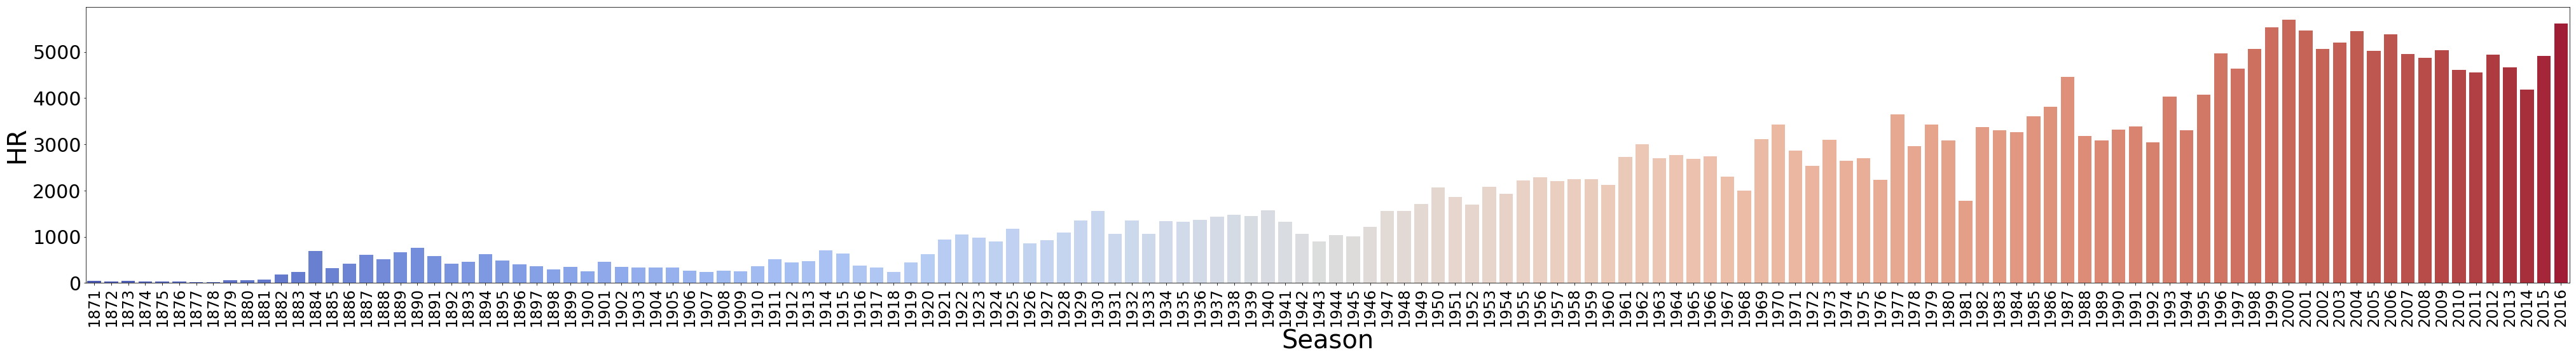

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
fig,axes=plt.subplots(figsize=(70,8))
by_year=df.groupby('yearID',as_index=False)[['HR']].sum()
sns.barplot(x='yearID',y='HR',data=by_year,palette='coolwarm')
plt.xlabel('Season',fontsize=40)
plt.xticks(rotation=90,fontsize=24)
plt.yticks(fontsize=30)
plt.ylabel('HR',fontsize=40)


### Using a line graph please graph the average HRs per AB (think about this) per season

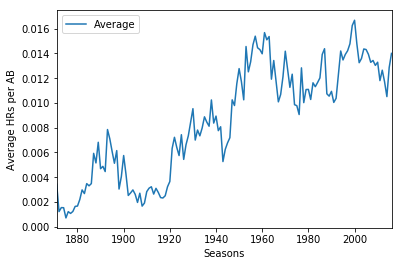

In [70]:
by_player_year=df.groupby(['playerID','yearID'],as_index=False)[['HR','AB']].sum()
by_player_year
by_player_year['Average']=np.where(by_player_year['AB']!=0,by_player_year['HR']/by_player_year['AB'],0)
final=by_player_year.groupby('yearID',as_index=False)[['Average']].mean()
final
final.plot(x='yearID',y='Average')
plt.xlabel("Seasons")
plt.ylabel("Average HRs per AB")
plt.show()